In [18]:
#Reads comments from all json files, and prints out how many profane comments there were 
filename = 'dota.txt'
commentsA=[]
commentCount = 0
file = open(filename,"r")
for comments in file:
    comment = comments.split("UTC] ")
    if len(comment) < 2:
        continue
    text = comment[1].split(": ")
    commentsA.append(text[1])
    commentCount = commentCount + 1
print (commentCount)

717418


In [40]:
#Reads comments from all json files, and prints out how many negative comments there were 
def read_comments_from_json2(filename, name):
    comments=[]
    commentCount = 0
    file = open(filename,"r")
    for c in file:
        comment = c.split("UTC] ")
        if len(comment) < 2:
            continue
        text = comment[1].split(": ")
        comments.append(text[1])
       
        commentCount = commentCount + 1
    negativeCount = 0
    newArray = predict_prob(comments)
    for everyNumber in newArray:
        if (everyNumber > 0.5):
            negativeCount = negativeCount + 1
    print (name + ": ", commentCount, negativeCount, negativeCount/commentCount)
    return comments 

In [63]:
import nltk, re, io

#Creates list of all comments 
singlePlayer_comments = read_comments_from_json2("Acai.txt", "Single Player")
dota_comments = read_comments_from_json2("dota.txt", "Dota")
fortnite_comments = read_comments_from_json2("fortnite.txt", "fortnite")
fifa_comments = read_comments_from_json2("nick.txt", "FIFA")
lol_comments = read_comments_from_json2("ship.txt", "League of Legends")
overwatch_comments = read_comments_from_json2("overwatch.txt", "Overwatch")
wow_comments = read_comments_from_json2("wow.txt", "World Of Warcraft")

Single Player:  16082 672 0.04178584753140157
Dota:  717418 12412 0.01730093195319883
fortnite:  392334 8091 0.02062273471073116
FIFA:  59639 1090 0.018276631063565786
League of Legends:  49636 1092 0.02200016117334193
Overwatch:  913306 7762 0.008498794489470123
World Of Warcraft:  980242 25764 0.026283305551078204


In [9]:
import sys

#installs package used
!{sys.executable} -m pip install profanity_check
from profanity_check import predict, predict_prob

In [64]:
import operator 

import re
from collections import Counter
from sklearn import preprocessing

#Preprocesses Everything  
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

In [65]:
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [66]:
##Includes sexual orientation and sexist terms
sexist_slurs = ['hag', 'pussy', 'bitch', 'cunt', 'golddigger', 'milf',       
                'tranny', 'bimbo','slut', 'whore', 'vag', 'vagina',
               'fag', 'faggit', 'dyke', 'queer', 'twink', 
               'gay', 'homo', 'lesbo', 'twat', 'thot']

##Focus on muslims, blacks, asians, hispanics, whites
racist_slurs = ['head-bangers', 'mosquito', 'mozzie',
               'clicker', 'albo', 'baboon', 'blackie', 'nigg'
               'brownie', 'clicky', 'darkie', 'negro', 'nigger',
               'nigglet', 'slave', 'ching-chong', 'chink', 'dog-eater',
               'egghead', 'zipperhead', 'amigo', 'beaner', 'chunga',
               '7-11', 'laden', 'jihad', 'osama', 'sandies', 'terrorist',
               'towel-head', 'illegal', 'albino', 'confederate', 'cracker',
               'redneck', 'whitetrash', 'monkey', 'gorilla']

In [79]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_Fornite = []
sexistComments_Fornite = []
countSexistFornite = 0
countRacistFornite = 0
countTotalFornite = 0
for line in fortnite_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_Fornite.append(word.lower())
                countSexistFornite = countSexistFornite + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_Fornite.append(word.lower())
                countRacistFornite = countRacistFornite + 1
        countTotalFornite = countTotalFornite + 1
print ("Sexist Count: ", countSexistFornite)
print ("Racist Count: ", countRacistFornite)
print ("Total Count: ", countTotalFornite)

Sexist Count:  1528
Racist Count:  249
Total Count:  2287776


In [80]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_Single = []
sexistComments_Single = []
countSexistSingle = 0
countRacistSingle = 0
countTotalSingle = 0
for line in singlePlayer_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_Single.append(word.lower())
                countSexistSingle = countSexistSingle + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_Single.append(word.lower())
                countRacistSingle = countRacistSingle + 1
        countTotalSingle = countTotalSingle + 1
print ("Sexist Count: ", countSexistSingle)
print ("Racist Count: ", countRacistSingle)
print ("Total Count: ", countTotalSingle)

Sexist Count:  66
Racist Count:  19
Total Count:  95033


In [81]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_wow = []
sexistComments_wow = []
countSexistwow = 0
countRacistwow = 0
countTotalwow = 0
for line in wow_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_wow.append(word.lower())
                countSexistwow = countSexistwow + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_wow.append(word.lower())
                countRacistwow = countRacistwow + 1
        countTotalwow = countTotalwow + 1
print ("Sexist Count: ", countSexistwow)
print ("Racist Count: ", countRacistwow)
print ("Total Count: ", countTotalwow)

Sexist Count:  4323
Racist Count:  542
Total Count:  4268256


In [82]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_dota = []
sexistComments_dota = []
countSexistdota = 0
countRacistdota = 0
countTotaldota = 0
for line in dota_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_dota.append(word.lower())
                countSexistdota = countSexistdota + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_dota.append(word.lower())
                countRacistdota = countRacistdota + 1
        countTotaldota = countTotaldota + 1
print ("Sexist Count: ", countSexistdota)
print ("Racist Count: ", countRacistdota)
print ("Total Count: ", countTotaldota)

Sexist Count:  4237
Racist Count:  927
Total Count:  3859948


In [83]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_fifa = []
sexistComments_fifa = []
countSexistfifa = 0
countRacistfifa = 0
countTotalfifa = 0
for line in singlePlayer_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_fifa.append(word.lower())
                countSexistfifa = countSexistfifa + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_fifa.append(word.lower())
                countRacistfifa = countRacistfifa + 1
        countTotalfifa = countTotalfifa + 1
print ("Sexist Count: ", countSexistfifa)
print ("Racist Count: ", countRacistfifa)
print ("Total Count: ", countTotalfifa)

Sexist Count:  66
Racist Count:  19
Total Count:  95033


In [84]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_lol = []
sexistComments_lol = []
countSexistlol = 0
countRacistlol = 0
countTotallol = 0
for line in lol_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_lol.append(word.lower())
                countSexistlol = countSexistlol + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_lol.append(word.lower())
                countRacistlol = countRacistlol + 1
        countTotallol = countTotallol + 1
print ("Sexist Count: ", countSexistlol)
print ("Racist Count: ", countRacistlol)
print ("Total Count: ", countTotallol)

Sexist Count:  77
Racist Count:  46
Total Count:  239563


In [85]:
#PREPROCESSES EVERYTHING and prints out sexist and racist word counts
racistComments_overwatch = []
sexistComments_overwatch = []
countSexistoverwatch = 0
countRacistoverwatch = 0
countTotaloverwatch = 0
for line in overwatch_comments:
    terms_all = [term for term in preprocess(line)]
    for word in terms_all:
        if (len(word) > 2):
            matching = [s for s in sexist_slurs if s in word.lower()]
            if (len(matching) > 0):
                sexistComments_overwatch.append(word.lower())
                countSexistoverwatch = countSexistoverwatch + 1
            matching2 = [s for s in racist_slurs if s in word.lower()]
            if (len(matching2) > 0):
                racistComments_overwatch.append(word.lower())
                countRacistoverwatch = countRacistoverwatch + 1
        countTotaloverwatch = countTotaloverwatch + 1
print ("Sexist Count: ", countSexistoverwatch)
print ("Racist Count: ", countRacistoverwatch)
print ("Total Count: ", countTotaloverwatch)

Sexist Count:  3924
Racist Count:  291
Total Count:  5024022


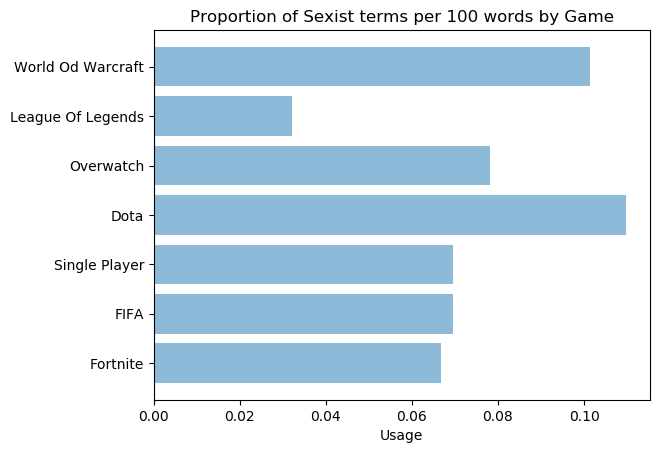

In [86]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#Titles of the games
objects = ('Fortnite','FIFA','Single Player',
          'Dota', 'Overwatch', 'League Of Legends', 'World Od Warcraft')
#Inputed results from the calculated values above for sexist terms by games
y_pos = np.arange(len(objects))
performance = [(countSexistFornite/countTotalFornite)*100, (countSexistfifa/countTotalfifa)*100, (countSexistSingle/countTotalSingle)*100,
                       (countSexistdota/countTotaldota)*100, (countSexistoverwatch/countTotaloverwatch)*100, (countSexistlol/countTotallol)*100, (countSexistwow/countTotalwow)*100]
#Horizontal bar graph
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Proportion of Sexist terms per 100 words by Game')
 
plt.show()

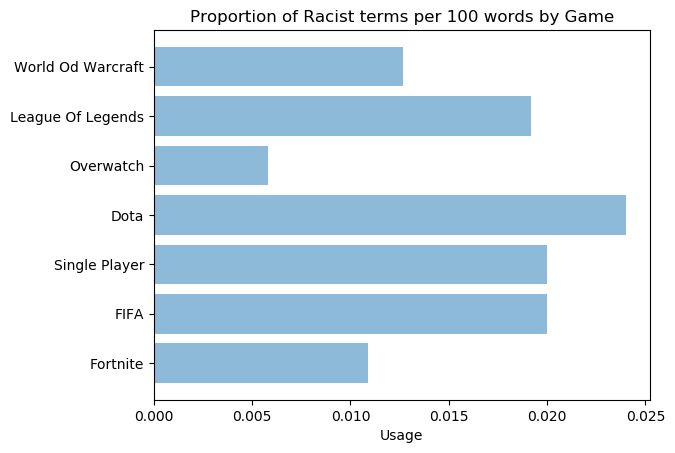

In [87]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#Titles of the games
objects = ('Fortnite','FIFA','Single Player',
          'Dota', 'Overwatch', 'League Of Legends', 'World Od Warcraft')
y_pos = np.arange(len(objects))
#Inputed results from the calculated values above for racist terms by games
performance = [(countRacistFornite/countTotalFornite)*100, (countRacistfifa/countTotalfifa)*100, (countRacistSingle/countTotalSingle)*100,
                       (countRacistdota/countTotaldota)*100, (countRacistoverwatch/countTotaloverwatch)*100, (countRacistlol/countTotallol)*100, (countRacistwow/countTotalwow)*100
 ]
#Horizontal bar graph
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Proportion of Racist terms per 100 words by Game')
 
plt.show()

In [1]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#Titles of the games
objects =('Fortnite','FIFA','Single Player',
          'Dota', 'Overwatch', 'League Of Legends', 'World of Warcraft')
y_pos = np.arange(len(objects))
#Inputed results from the calculated values above for profane comments by games
performance = [(8091/392334)*100, (1090/59639)*100, (672/16082)*100,
                       (12412/717418)*100, (7762/913306)*100, (25764/980242)*100, (25764/980242)*100]

#Horizontal bar graph
plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Usage')
plt.title('Proportion of Profane Comments per 100 c by Game')
 
plt.show()

<Figure size 640x480 with 1 Axes>

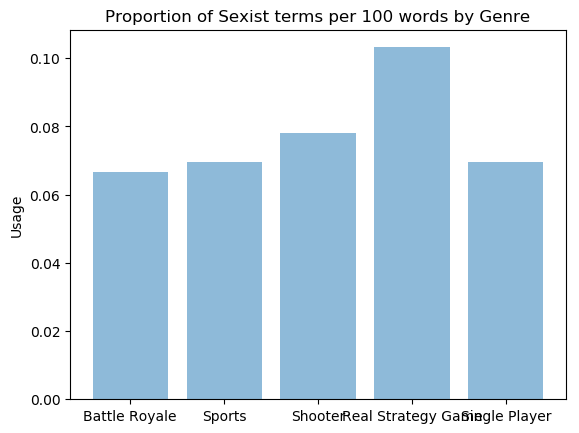

In [90]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#Titles of the genres
objects = ('Battle Royale', 'Sports', 'Shooter','Real Strategy Game', 'Single Player')
y_pos = np.arange(len(objects))
#Inputed results from the calculated values above for sexist terms by genre
performance = [(countSexistFornite/countTotalFornite)*100,(countSexistfifa/countTotalfifa)*100,(countSexistoverwatch/countTotaloverwatch)*100,(8637/8367767)*100, (countSexistSingle/countTotalSingle)*100]

#Vertical Bar graph
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Proportion of Sexist terms per 100 words by Genre')
 
plt.show()

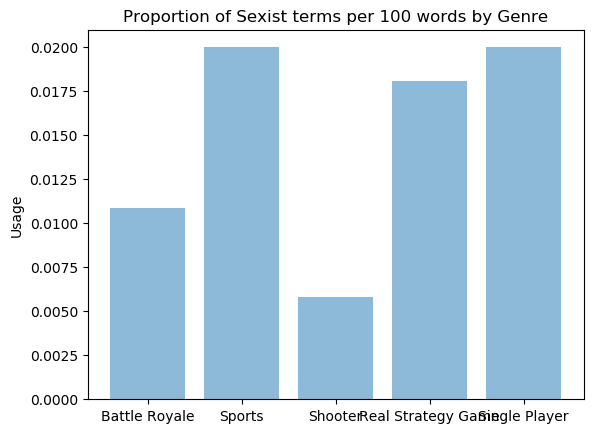

In [91]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

#Titles of the genres
objects = ('Battle Royale', 'Sports', 'Shooter','Real Strategy Game', 'Single Player')
y_pos = np.arange(len(objects))
#Inputed results from the calculated values above for racist terms by games
performance = [(countRacistFornite/countTotalFornite)*100,(countRacistfifa/countTotalfifa)*100,(countRacistoverwatch/countTotaloverwatch)*100,(1515/8367767)*100, (countRacistSingle/countTotalSingle)*100]

#Vertical Bar graph
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Proportion of Sexist terms per 100 words by Genre')
 
plt.show()

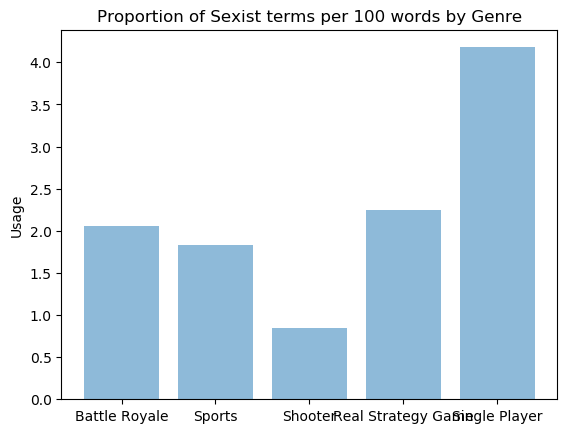

In [92]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
#Titles of the genres
objects = ('Battle Royale', 'Sports', 'Shooter','Real Strategy Game', 'Single Player')
y_pos = np.arange(len(objects))
#Inputed results from the calculated values above for profane comments by genre
performance = [(8091/392334)*100,(1090/59639)*100,(7762/913306)*100,(39268/1747296)*100, (672/16082)*100]
 
#Vertical Bar graph
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Proportion of Profane comments per 100 comments by Genre')
 
plt.show()